In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
data = 'Test.csv'

df = pd.read_csv(data)

In [4]:
# 查看數據集的維度
df.shape

(939, 12)

In [5]:
# 預覽數據集
df.head()

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,現金股利,股價,董監持股(%),ROE_Test,EPS_Test,毛利率_Test
0,1101,台泥,11.00,3.69,26.64,5.87,2.34,39.85,8.38,1,1,1
1,1102,亞泥,9.81,4.05,24.67,6.29,2.77,44.05,27.37,0,1,1
2,1103,嘉泥,5.24,1.65,6.44,5.10,0.91,17.85,17.15,0,1,0
3,1104,環泥,6.66,1.82,14.24,4.79,1.04,21.70,24.16,0,1,0
4,1108,幸福,1.71,0.21,8.77,5.47,0.58,10.60,3.95,0,1,0


In [6]:
# 查看數據集摘要
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   代碼        939 non-null    int64  
 1   股票        939 non-null    object 
 2   ROE_5Y    939 non-null    float64
 3   EPS_5Y    939 non-null    float64
 4   毛利率_5Y    939 non-null    float64
 5   現金殖利率     939 non-null    float64
 6   現金股利      939 non-null    float64
 7   股價        939 non-null    float64
 8   董監持股(%)   939 non-null    float64
 9   ROE_Test  939 non-null    int64  
 10  EPS_Test  939 non-null    int64  
 11  毛利率_Test  939 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 88.2+ KB


In [7]:
# 變量中值的頻率分佈
# 現在，我將檢查分類變量的頻率計數。

In [10]:
col_names = ['ROE_5Y', 'EPS_5Y', '毛利率_5Y', '現金殖利率', '股價', '董監持股(%)','毛利率_Test']

for col in col_names:
    
    print(df[col].value_counts())

 0.00     11
 19.07     4
 9.51      3
 14.37     3
 5.93      3
          ..
 31.97     1
-16.37     1
 17.74     1
 7.62      1
 8.58      1
Name: ROE_5Y, Length: 819, dtype: int64
1.75    8
0.66    8
0.62    5
0.55    5
0.33    5
       ..
4.52    1
3.17    1
0.82    1
4.32    1
7.47    1
Name: EPS_5Y, Length: 607, dtype: int64
0.00     34
18.67     3
20.74     3
22.37     3
30.69     3
         ..
12.95     1
44.10     1
9.32      1
17.08     1
16.63     1
Name: 毛利率_5Y, Length: 810, dtype: int64
0.00    49
4.89     5
3.76     5
4.41     5
2.61     5
        ..
9.20     1
3.24     1
7.38     1
3.40     1
3.83     1
Name: 現金殖利率, Length: 527, dtype: int64
0.00     8
14.20    5
15.00    4
16.55    4
83.20    4
        ..
11.60    1
29.70    1
47.60    1
57.60    1
20.50    1
Name: 股價, Length: 720, dtype: int64
0.00     78
17.13     4
10.44     3
21.78     3
20.88     3
         ..
33.29     1
10.91     1
90.70     1
22.71     1
39.16     1
Name: 董監持股(%), Length: 781, dtype: int64
1    

In [11]:
df['毛利率_Test'].value_counts()

1    476
0    463
Name: 毛利率_Test, dtype: int64

In [12]:
df.isnull().sum()

代碼          0
股票          0
ROE_5Y      0
EPS_5Y      0
毛利率_5Y      0
現金殖利率       0
現金股利        0
股價          0
董監持股(%)     0
ROE_Test    0
EPS_Test    0
毛利率_Test    0
dtype: int64

In [13]:
X = df.drop(['代碼', '股票', 'ROE_Test', 'EPS_Test', '毛利率_Test'], axis=1)

y = df['毛利率_Test']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [15]:
X_train.shape, X_test.shape

((629, 7), (310, 7))

In [16]:
X_train.dtypes

ROE_5Y     float64
EPS_5Y     float64
毛利率_5Y     float64
現金殖利率      float64
現金股利       float64
股價         float64
董監持股(%)    float64
dtype: object

In [17]:
X_train.head()

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,現金股利,股價,董監持股(%)
144,12.62,2.37,9.30,6.73,1.06,15.75,12.41
135,20.70,21.36,49.00,1.02,7.88,772.00,4.05
164,4.47,0.48,7.34,1.66,0.28,16.85,9.36
28,10.47,1.97,15.90,3.76,0.86,22.85,24.42
525,12.77,2.19,5.99,5.53,1.45,26.20,10.83


In [18]:
import category_encoders as ce

In [19]:
encoder = ce.OrdinalEncoder(cols=['ROE_5Y', 'EPS_5Y', '毛利率_5Y', '現金殖利率', '股價', '董監持股(%)'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [20]:
X_train.head()

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,現金股利,股價,董監持股(%)
144,1,1,1,1,1.06,1,1
135,2,2,2,2,7.88,2,2
164,3,3,3,3,0.28,3,3
28,4,4,4,4,0.86,4,4
525,5,5,5,5,1.45,5,5


In [21]:
X_test.head()

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,現金股利,股價,董監持股(%)
299,-1.0,449.0,-1.0,25.0,0.00,419.0,269.0
63,-1.0,-1.0,-1.0,-1.0,2.63,219.0,11.0
136,292.0,-1.0,-1.0,375.0,1.20,-1.0,-1.0
597,-1.0,-1.0,-1.0,-1.0,0.60,-1.0,11.0
261,-1.0,277.0,-1.0,-1.0,0.10,-1.0,-1.0


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
y_pred_gini = clf_gini.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6032


In [26]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [27]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.6661


In [28]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.6661
Test set score: 0.6032


[Text(0.5, 0.875, 'X[4] <= 1.165\ngini = 0.5\nsamples = 629\nvalue = [312, 317]'),
 Text(0.25, 0.625, 'X[2] <= 74.0\ngini = 0.47\nsamples = 304\nvalue = [189, 115]'),
 Text(0.125, 0.375, 'X[6] <= 61.5\ngini = 0.331\nsamples = 62\nvalue = [49, 13]'),
 Text(0.0625, 0.125, 'gini = 0.461\nsamples = 36\nvalue = [23, 13]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.375, 0.375, 'X[6] <= 294.5\ngini = 0.488\nsamples = 242\nvalue = [140, 102]'),
 Text(0.3125, 0.125, 'gini = 0.499\nsamples = 135\nvalue = [65, 70]'),
 Text(0.4375, 0.125, 'gini = 0.419\nsamples = 107\nvalue = [75, 32]'),
 Text(0.75, 0.625, 'X[5] <= 196.0\ngini = 0.47\nsamples = 325\nvalue = [123, 202]'),
 Text(0.625, 0.375, 'X[4] <= 3.98\ngini = 0.389\nsamples = 121\nvalue = [32, 89]'),
 Text(0.5625, 0.125, 'gini = 0.442\nsamples = 88\nvalue = [29, 59]'),
 Text(0.6875, 0.125, 'gini = 0.165\nsamples = 33\nvalue = [3, 30]'),
 Text(0.875, 0.375, 'X[1] <= 258.5\ngini = 0.494\nsamples = 204\nvalue = [91

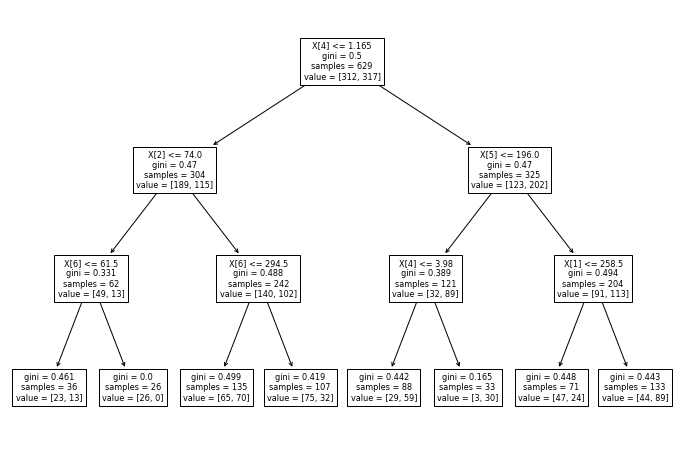

In [29]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 